In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
images = glob.glob('training_data/vehicles/*/*.png')
cars = []
for file in images:
    image = np.array(mpimg.imread(file)*255, dtype=np.uint8)
    cars.append(image)

images = glob.glob('training_data/non-vehicles/*/*.png')
notcars = []
for file in images:
    image = np.array(mpimg.imread(file)*255, dtype=np.uint8)
    notcars.append(image)
    
data_images = np.vstack((cars, notcars))     
data_labels = np.hstack((np.ones(len(cars)), np.zeros(len(notcars))))

print('Data set consists of {} cars and {} non-cars of size: {} and data type: {}.'.
      format(len(cars), len(notcars), data_images[0].shape, data_images[0].dtype))

# Save the dataset for later use
dist_pickle = {}
dist_pickle["images"] = data_images
dist_pickle["labels"] = data_labels
pickle.dump( dist_pickle, open( "training_data/dataset.p", "wb" ) )

Data set consists of 8792 cars and 8968 non-cars of size: (64, 64, 3) and data type: uint8.


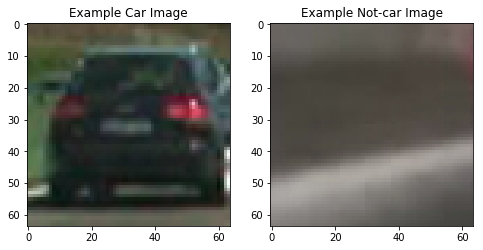

In [3]:
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = data_images[car_ind]
notcar_image = data_images[len(cars)+notcar_ind]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(car_image)
ax1.set_title('Example Car Image')
ax2.imshow(notcar_image)
ax2.set_title('Example Not-car Image')

## Hard Negative Mining

In [4]:
images = glob.glob('training_data/false_pos/*.png')
false_pos = []
for file in images:
    image = np.array(mpimg.imread(file)*255, dtype=np.uint8)
    false_pos.append(image[:,:,:3])
    
data_images = np.array(false_pos)     
data_labels = np.zeros(len(false_pos))

print('Data set consists of {} false positive images of size: {} and data type: {}.'.
      format(len(false_pos), data_images[0].shape, data_images[0].dtype))

# Save the dataset for later use
dist_pickle = {}
dist_pickle["images"] = data_images
dist_pickle["labels"] = data_labels
pickle.dump( dist_pickle, open( "training_data/dataset_falsePos.p", "wb" ) )

Data set consists of 1473 false positive images of size: (64, 64, 3) and data type: uint8.


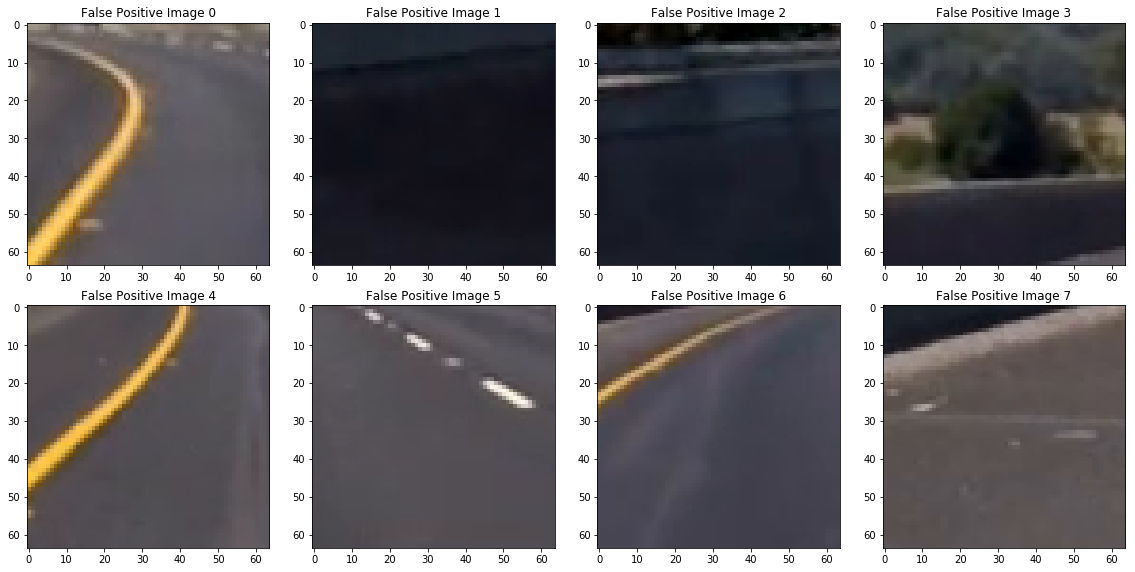

In [5]:
inds = np.random.randint(0, len(false_pos), size=8)

nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(16,8))
for idx, image in enumerate(data_images[inds]):
    plt.subplot(nrows,ncols, idx+1)
    plt.imshow(image)
    plt.title("False Positive Image {:d}".format(idx))
fig.tight_layout()
plt.show()